# ayuda

"Excelente Max!


Ahora hay que juntar las curvas de luz de las distintas épocas, con los offsets apropiados, y determinar bien los periodos. 


Puedes ir viendo: https://period04.net/"

Raul, 30 Junio 2025

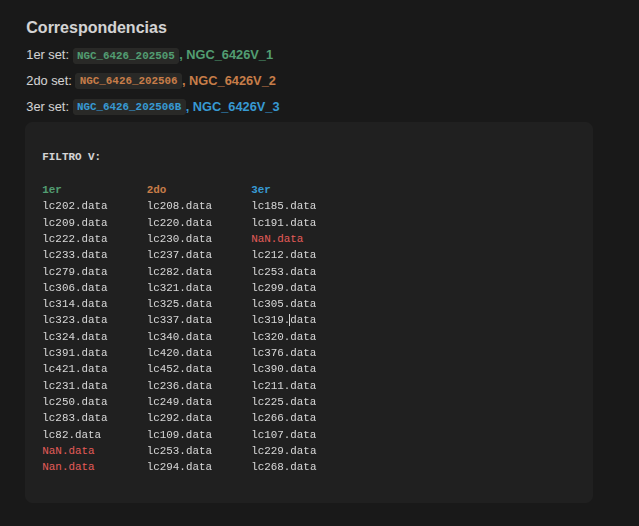

# Procesamos las curvas 

"Juntar curvas NGC 6426" en Notion

# Empezamos

In [57]:
import pandas as pd

from smoothing_methods import plot_lc, plot_axes_lc, plot_subset, smooth_lc, shift_phase

In [65]:
# Archivos
DATA_DIR_0 = 'NGC_6426V_1'
LC_NUM_0 = 202
data_file_0 = f'{DATA_DIR_0}/processed/lc{str(LC_NUM_0)}_processed.data'

# Leemos
lc_data_0 = pd.read_csv(data_file_0, index_col ="file", delim_whitespace=True)

# Datos
print('median flux: ', lc_data_0['Flux'].median())

lc_data_0.head(5)

median flux:  144.5655


/tmp/ipykernel_19152/2879000469.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data_0 = pd.read_csv(data_file_0, index_col ="file", delim_whitespace=True)


,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER
file,,,,,,,,
202505060414o.fit,401.830477,1199.4231,21.111030,0.7817,401.826493,07:49:04,130.0,V
202505060416o.fit,401.833938,1231.5111,21.103599,0.7365,401.829954,07:54:03,130.0,V
202505060419o.fit,401.840153,1384.3107,21.422218,0.8582,401.836169,08:02:35,180.0,V
202505060421o.fit,401.844170,1368.4204,21.425776,0.8381,401.840185,08:08:22,180.0,V
202505060423o.fit,401.848175,1406.9152,21.417177,0.8403,401.844190,08:14:08,180.0,V


In [66]:
# Archivos
DATA_DIR_1 = 'NGC_6426V_2'
LC_NUM_1 = 208
data_file_1 = f'{DATA_DIR_1}/processed/lc{str(LC_NUM_1)}_processed.data'

# Leemos
lc_data_1 = pd.read_csv(data_file_1, index_col ="file", delim_whitespace=True)

# Datos
print('median flux: ', lc_data_1['Flux'].median())

lc_data_1.head(5)

median flux:  -597.0101


/tmp/ipykernel_19152/3057070599.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data_1 = pd.read_csv(data_file_1, index_col ="file", delim_whitespace=True)


,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER
file,,,,,,,,
202506020002o.fit,428.732170,-1732.3960,22.819551,0.8838,428.727095,05:25:41,160.0,V
202506020004o.fit,428.761499,-1202.6025,22.420307,0.8384,428.756424,06:07:55,160.0,V
202506020006o.fit,428.765539,-1135.4137,22.378746,0.8051,428.760463,06:13:44,160.0,V
202506020008o.fit,428.769578,-968.6148,22.281964,0.8519,428.764502,06:19:33,160.0,V
202506020010o.fit,428.773629,-833.0852,22.209220,0.7489,428.768553,06:25:23,160.0,V


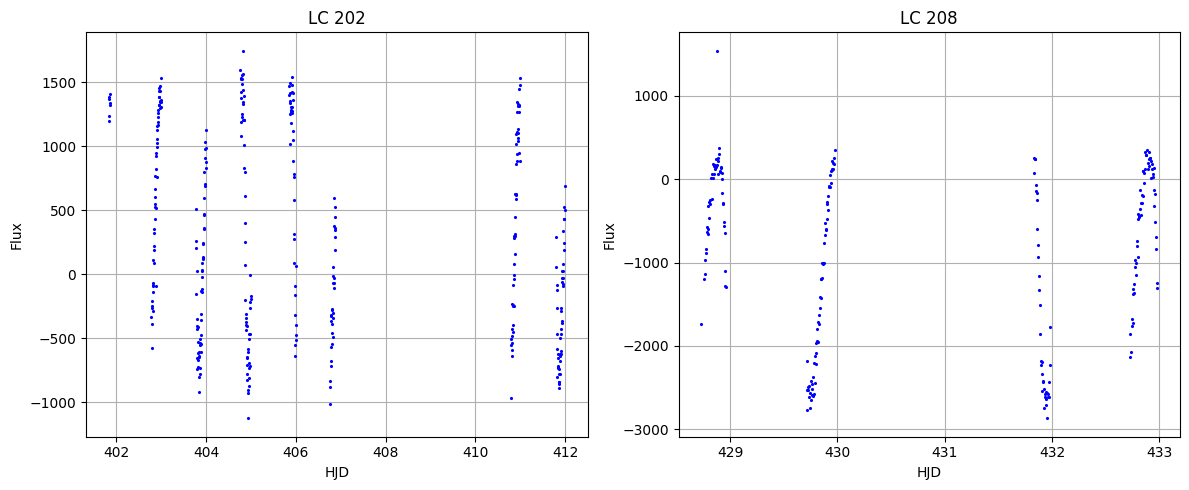

In [67]:
import matplotlib.pyplot as plt

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# fig 1
plot_axes_lc(lc_data_0['HJD'], lc_data_0['Flux'], ax=axs[0])
axs[0].set_title(f'LC {LC_NUM_0}')

# fig 2
plot_axes_lc(lc_data_1['HJD'], lc_data_1['Flux'], ax=axs[1])
axs[1].set_title(f'LC {LC_NUM_1}')


# plot
plt.tight_layout()
plt.show()

### Offset lab

queremos pasar la mediana de la segunda -597.0101 a la primera 144.5655

In [68]:
offset = abs(-597.0101) + 144.5655
offset

741.5755999999999

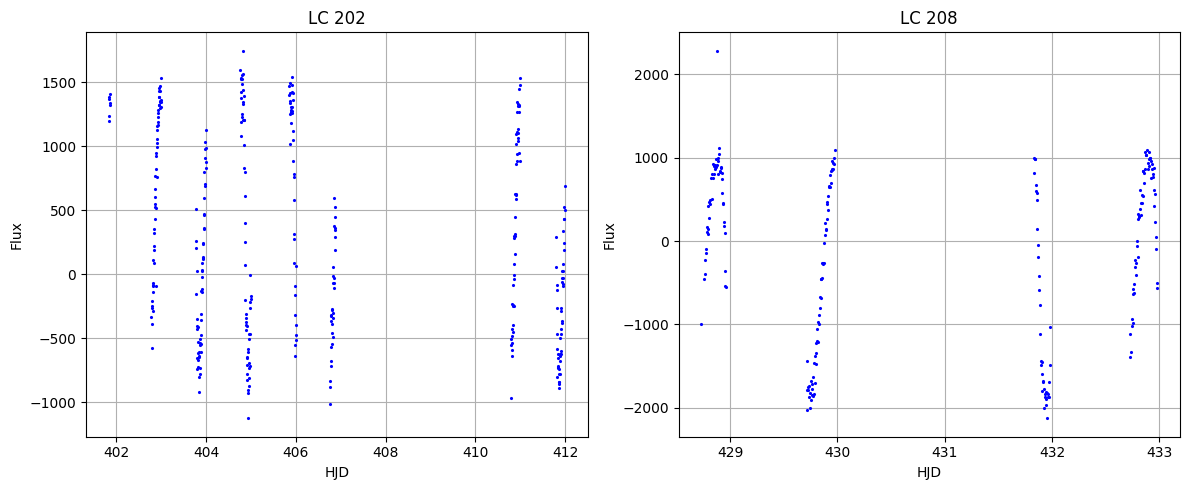

In [69]:
#plot_lc(lc_data_1['HJD'], lc_data_1['Flux'] + offset)


# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# fig 1
plot_axes_lc(lc_data_0['HJD'], lc_data_0['Flux'], ax=axs[0])
axs[0].set_title(f'LC {LC_NUM_0}')

# fig 2
plot_axes_lc(lc_data_1['HJD'], lc_data_1['Flux']+ offset, ax=axs[1])
axs[1].set_title(f'LC {LC_NUM_1}')


# plot
plt.tight_layout()
plt.show()

# sigma rejection

In [70]:
from sigma_rejection import sigma_rejection

lc_data_1_filt = sigma_rejection(lc_data_1, 'Flux', 2)

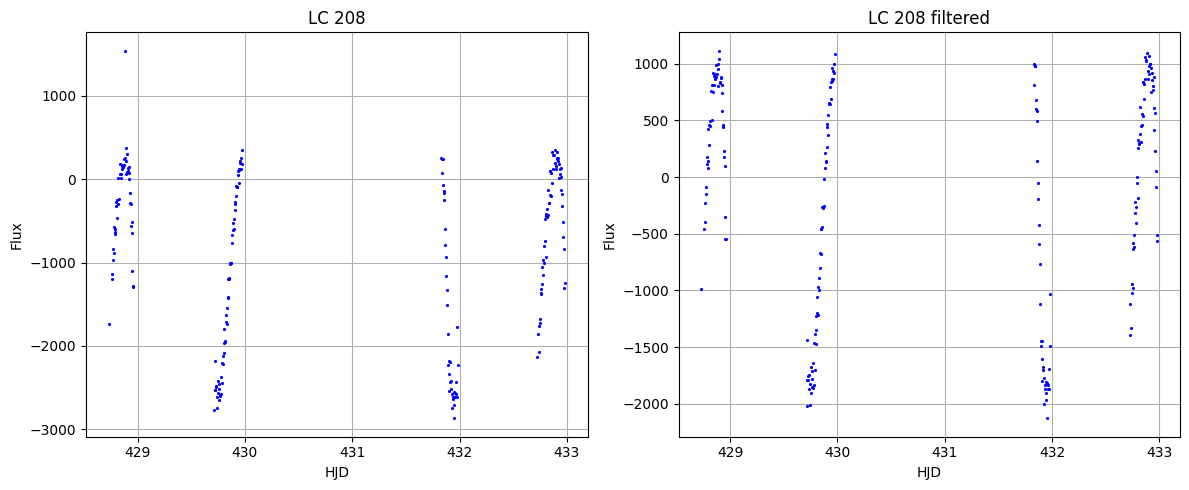

In [71]:
# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# fig 1
plot_axes_lc(lc_data_1['HJD'], lc_data_1['Flux'], ax=axs[0])
axs[0].set_title(f'LC {LC_NUM_1}')

# fig 2
plot_axes_lc(lc_data_1_filt['HJD'], lc_data_1_filt['Flux']+ offset, ax=axs[1])
axs[1].set_title(f'LC {LC_NUM_1} filtered')


# plot
plt.tight_layout()
plt.show()

# Rangos

In [50]:
print(lc_data_1['Flux'].min(), lc_data_1['Flux'].max())
print(abs(lc_data_1['Flux'].min() - lc_data_1['Flux'].max()))

-2870.2465 1542.8854
4413.1319


In [51]:
print(lc_data_1_filt['Flux'].min(), lc_data_1_filt['Flux'].max())
print(abs(lc_data_1_filt['Flux'].min() - lc_data_1_filt['Flux'].max()))

-2870.2465 373.1703
3243.4168


In [52]:
print(lc_data_0['Flux'].min(), lc_data_0['Flux'].max())
print(abs(lc_data_0['Flux'].min() - lc_data_0['Flux'].max()))

-1125.8842 1744.9753
2870.8595


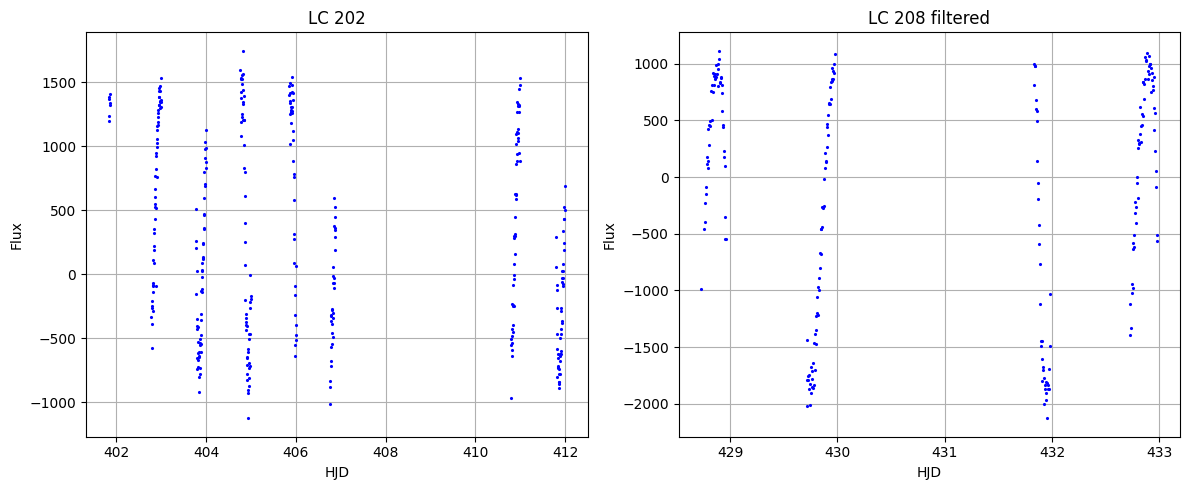

In [53]:
# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# fig 1
plot_axes_lc(lc_data_0['HJD'], lc_data_0['Flux'], ax=axs[0])
axs[0].set_title(f'LC {LC_NUM_0}')

# fig 2
plot_axes_lc(lc_data_1_filt['HJD'], lc_data_1_filt['Flux']+ offset, ax=axs[1])
axs[1].set_title(f'LC {LC_NUM_1} filtered')


# plot
plt.tight_layout()
plt.show()